### Libtfr example jupyter notebook
- [libtfr](https://melizalab.github.io/libtfr/) ( is a library written by [Dan Meliza's lab](https://meliza.org/) to produce time-frequency reassigned (TFR) spectrograms in Python. TFR is a method used to produce sharper spectrograms than conventional spectrograms (e.g. STFT spectrograms). This notebook just takes an example spectrogram, and compares a STFT spectrogram using Librosa to a TFR spectrgram. 

In [1]:
import libtfr
from librosa import display
from scipy.signal import chirp
import numpy as np
import matplotlib.pyplot as plt
import librosa

### load data

In [2]:
import urllib.request
import soundfile as sf
import IPython
import io
url = "https://raw.githubusercontent.com/timsainb/python_spectrograms_and_inversion/master/bushOffersPeace.wav"
response = urllib.request.urlopen(url)
y, sr = sf.read(io.BytesIO(response.read()))

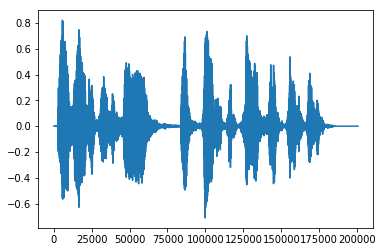

In [3]:
plt.plot(y)
IPython.display.Audio(data=y, rate=sr)

### librosa spectrogram

In [18]:
nfft= 4096
hop_len = int(nfft/16)
D = np.abs(librosa.stft(y, n_fft=nfft, hop_length = hop_len))
print(np.shape(D), np.max(D), np.min(D))
D = librosa.amplitude_to_db(D, ref=np.max, top_db = 50)
print(np.shape(D), np.max(D), np.min(D))

(2049, 784) 362.91385 0.0
(2049, 784) -3.8146973e-06 -50.000004


In [20]:
np.shape(D)

(2049, 784)

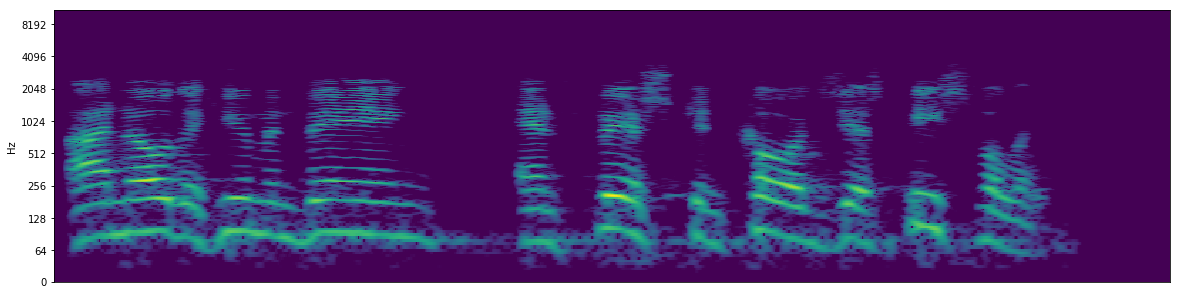

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
display.specshow(D, y_axis='log', cmap='viridis')

### libtfr time-frequency reassigned spectrogram

In [15]:
"""
s - input signal (real)
N - number of frequency points
step - step size (in time points)
Np - window size (should be <= N)
K - number of tapers to use (default 6)
tm - time support of tapers (default 6.0)
flock - frequency locking parameter; power is not reassigned
        more than this value (normalized frequency; default 0.01)
tlock - time locking parameter (in frames; default 5)
fgrid - output frequency bins: monotonically increasing
        (default linear scale with N points; Nyquist is 1.0)

returns an N/2+1 by L power spectrogram, or if fgrid is specified,
fgrid.size by L
"""
nfft = 4096
Np = nfft
shift = nfft/16
K = 6
tm = 6.0
flock = 0.01
tlock = 5

In [16]:
S = np.abs(libtfr.tfr_spec(s=y, N=nfft, step=shift, Np=Np, K=K, tm=tm, flock=flock, tlock=tlock))
print(np.shape(S), np.max(S), np.min(S))
S = librosa.amplitude_to_db(S, ref=np.max, top_db =100)
print(np.shape(S), np.max(S), np.min(S))

(2049, 768) 1084.6206010126505 0.0
(2049, 768) 0.0 -100.0


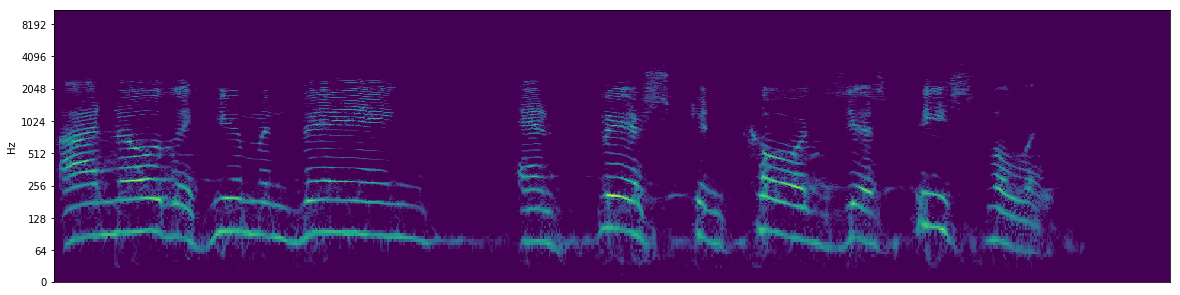

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
display.specshow(S, y_axis='log', cmap='viridis')